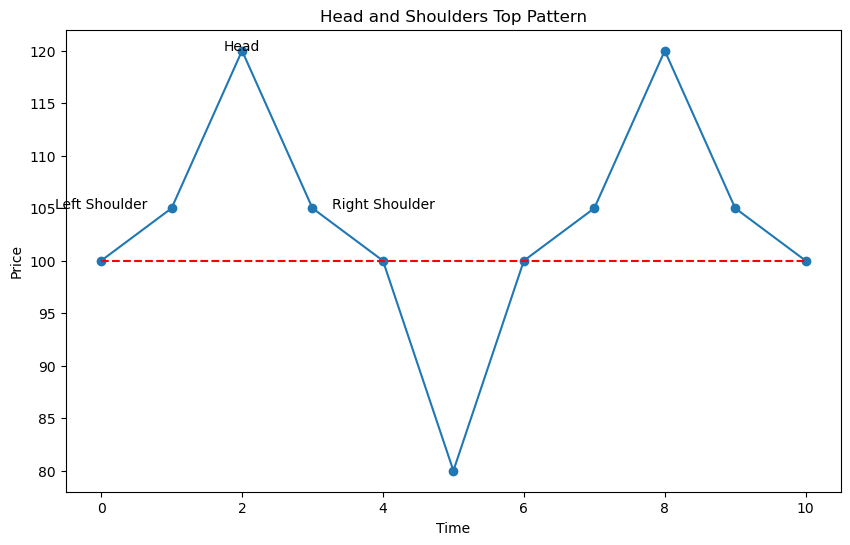

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# 假设的股票价格
prices = np.array([100, 105, 120, 105, 100, 80, 100, 105, 120, 105, 100])
times = np.array(range(len(prices)))
# 绘制价格图
plt.figure(figsize=(10, 6))
plt.plot(times, prices, marker='o')
# 绘制颈线
neckline = np.array([100]*len(times))
plt.plot(times, neckline, 'r--')
# 标注头和肩
plt.text(2, 120, 'Head', ha='center')
plt.text(0, 105, 'Left Shoulder', ha='center')
plt.text(4, 105, 'Right Shoulder', ha='center')
# 设置图形标题和轴标签
plt.title('Head and Shoulders Top Pattern')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

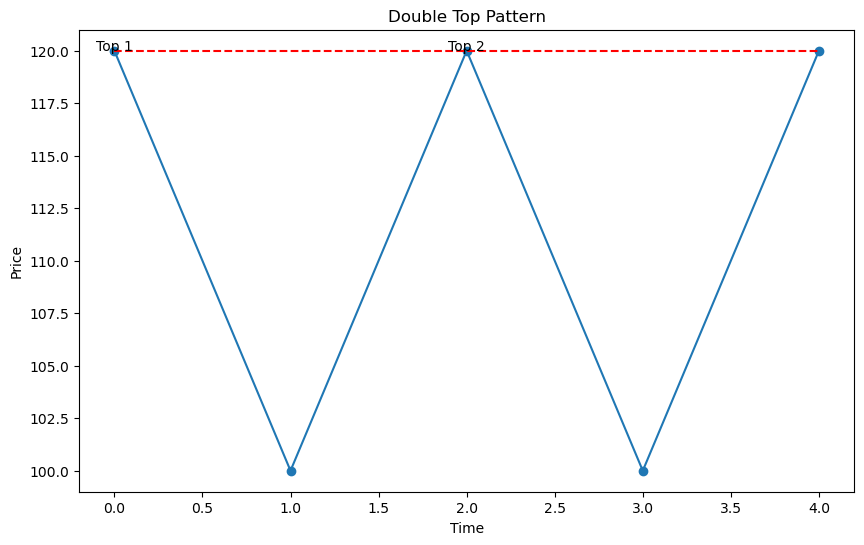

In [2]:
# 假设的股票价格
prices = np.array([120, 100, 120, 100, 120])
times = np.array(range(len(prices)))
# 绘制价格图
plt.figure(figsize=(10, 6))
plt.plot(times, prices, marker='o')
# 绘制颈线
neckline = np.array([120]*len(times))
plt.plot(times, neckline, 'r--')
# 标注顶点
plt.text(0, 120, 'Top 1', ha='center')
plt.text(2, 120, 'Top 2', ha='center')
# 设置图形标题和轴标签
plt.title('Double Top Pattern')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

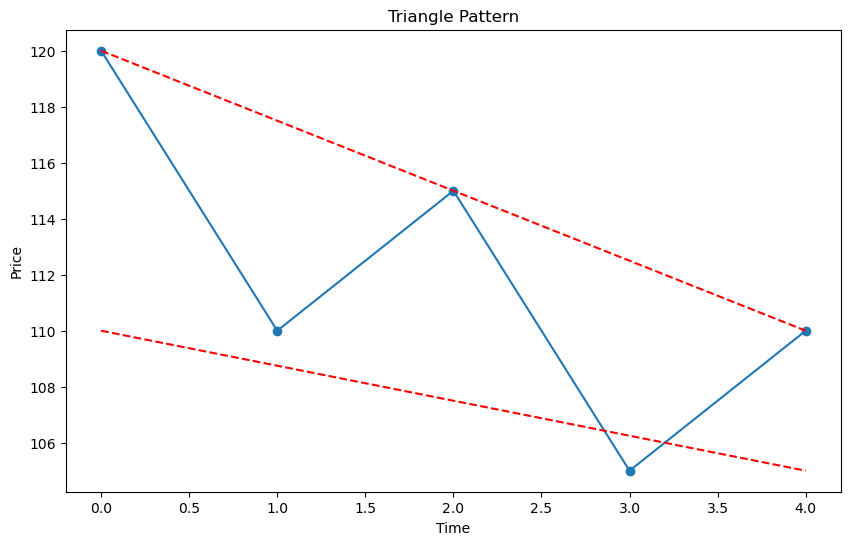

In [3]:
# 假设的股票价格
prices = np.array([120, 110, 115, 105, 110])
times = np.array(range(len(prices)))
# 绘制价格图
plt.figure(figsize=(10, 6))
plt.plot(times, prices, marker='o')
# 绘制三角形模式
plt.plot([times[0], times[-1]], [prices[0], prices[-1]], 'r--')  # 顶线
plt.plot([times[0], times[-1]], [prices[1], prices[3]], 'r--')  # 底线
# 设置图形标题和轴标签
plt.title('Triangle Pattern')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

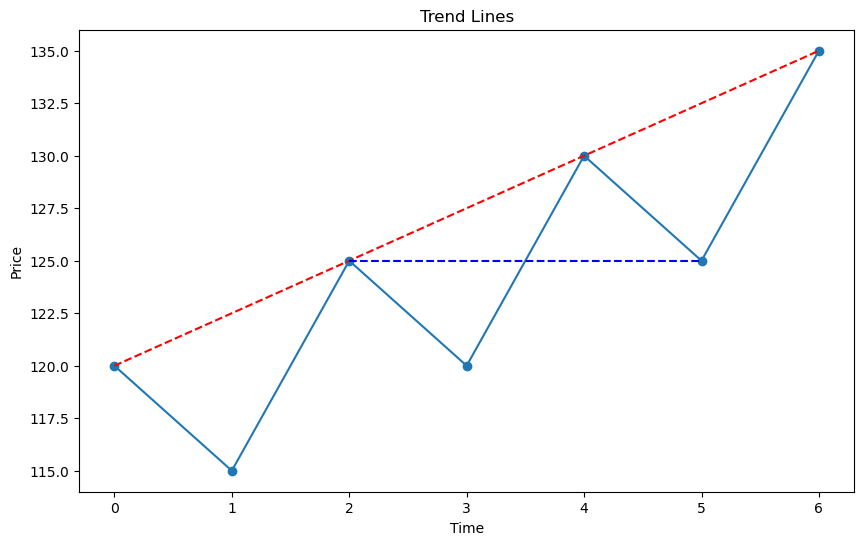

In [4]:
# 假设的股票价格
prices = np.array([120, 115, 125, 120, 130, 125, 135])
times = np.array(range(len(prices)))
# 绘制价格图
plt.figure(figsize=(10, 6))
plt.plot(times, prices, marker='o')
# 绘制上升趋势线
plt.plot([times[0], times[-1]], [prices[0], prices[-1]], 'r--')
# 绘制下降趋势线
plt.plot([times[2], times[-2]], [prices[2], prices[-2]], 'b--')
# 设置图形标题和轴标签
plt.title('Trend Lines')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [5]:
pip install pandas_ta

Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


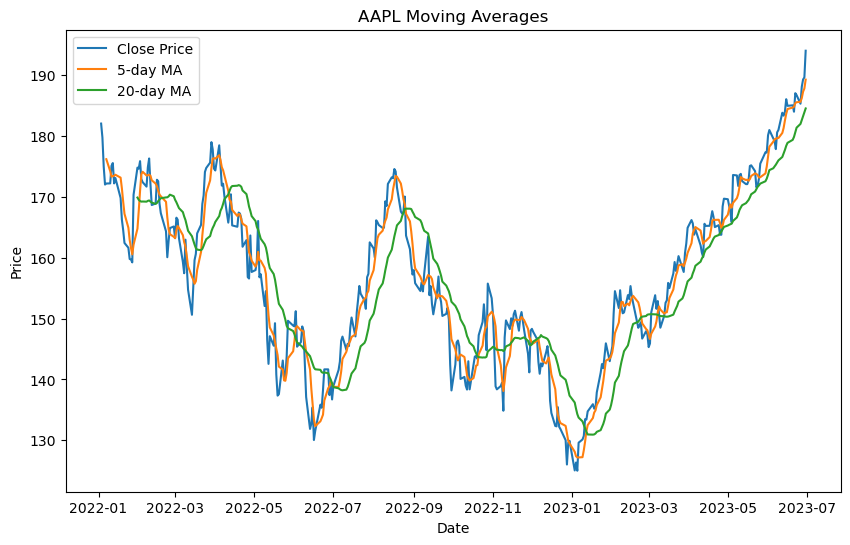

In [6]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import matplotlib.pyplot as plt
# 下载数据
data = yf.download('AAPL', start='2022-01-01', end='2023-07-01')
# 计算5日和20日移动平均线
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
# 绘制图形
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA5'], label='5-day MA')
plt.plot(data['MA20'], label='20-day MA')
plt.title('AAPL Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

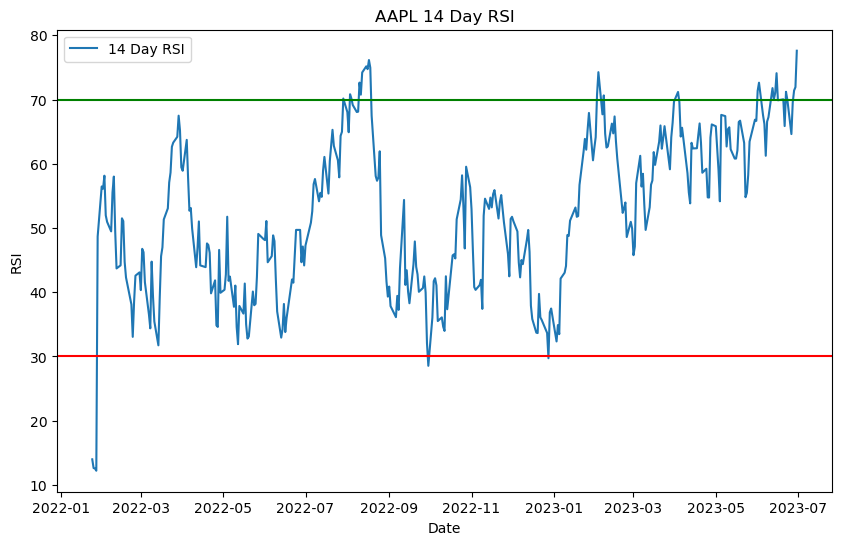

In [7]:
# 计算14天RSI
data.ta.rsi(close='Close', length=14, append=True)
# 绘制图形
plt.figure(figsize=(10,6))
plt.plot(data['RSI_14'], label='14 Day RSI')
plt.title('AAPL 14 Day RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(30, color='red') # 超卖线
plt.axhline(70, color='green') # 超买线
plt.legend()
plt.show()

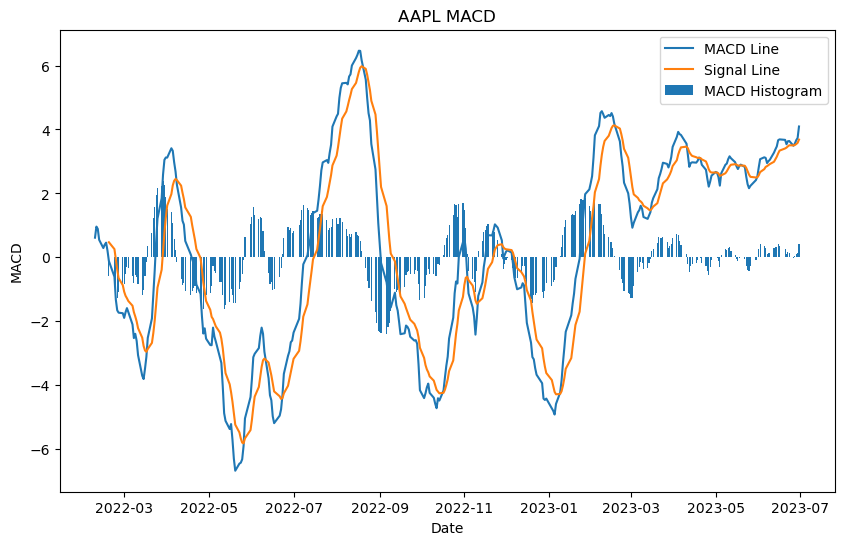

In [8]:
# 计算MACD
data.ta.macd(fast=12, slow=26, signal=9, append=True)
# 绘制图形
plt.figure(figsize=(10,6))
plt.plot(data['MACD_12_26_9'], label='MACD Line')
plt.plot(data['MACDs_12_26_9'], label='Signal Line')
plt.bar(data.index, data['MACDh_12_26_9'], label='MACD Histogram')
plt.title('AAPL MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

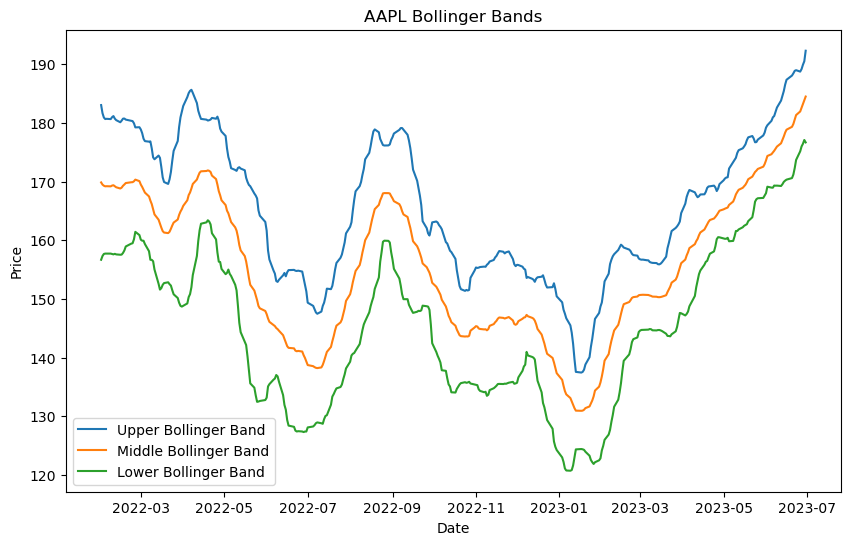

In [9]:
# 计算布林带
data.ta.bbands(length=20, append=True)
# 绘制图形
plt.figure(figsize=(10,6))
plt.plot(data['BBU_20_2.0'], label='Upper Bollinger Band')
plt.plot(data['BBM_20_2.0'], label='Middle Bollinger Band')
plt.plot(data['BBL_20_2.0'], label='Lower Bollinger Band')
plt.title('AAPL Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

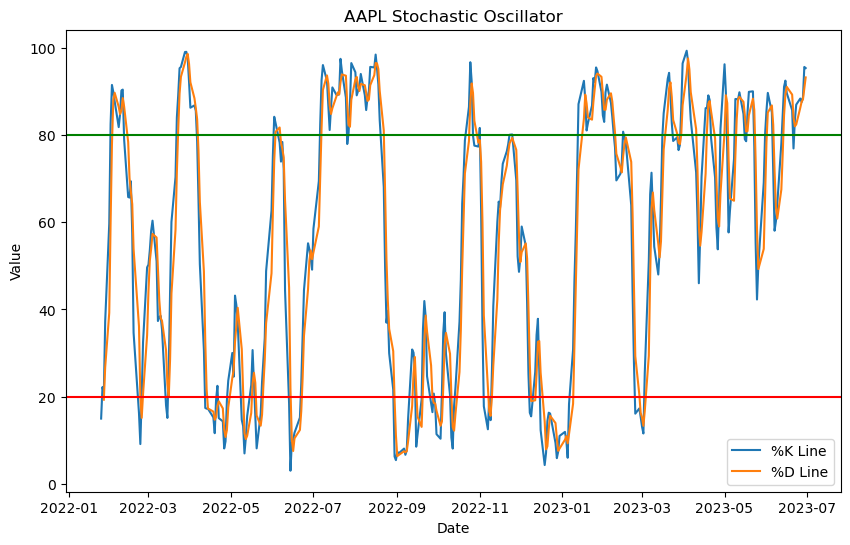

In [10]:
# 计算斯托卡斯特克指标
data.ta.stoch(high='High', low='Low', close='Close', fast_k=14, slow_k=3, slow_d=3, append=True)
# 绘制图形
plt.figure(figsize=(10,6))
plt.plot(data['STOCHk_14_3_3'], label='%K Line')
plt.plot(data['STOCHd_14_3_3'], label='%D Line')
plt.title('AAPL Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.axhline(20, color='red') # 超卖线
plt.axhline(80, color='green') # 超买线
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


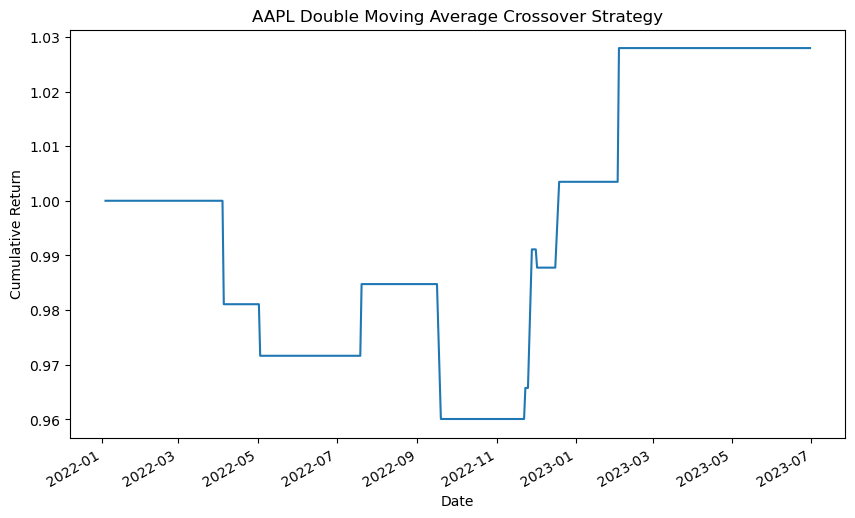

In [11]:
# 下载苹果公司的历史数据
data = yf.download('AAPL', start='2022-01-01', end='2023-07-01')
# 计算移动平均线
data.ta.sma(close='Close', length=20, append=True)
data.ta.sma(close='Close', length=50, append=True)
# 创建信号
data['Buy_Signal'] = (data['SMA_20'] > data['SMA_50']).astype(int)
data['Sell_Signal'] = (data['SMA_20'] < data['SMA_50']).astype(int)
# 计算策略收益
data['Strategy_Return'] = data['Buy_Signal'].diff() * data['Close'].pct_change()
# 计算累计收益
data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()
# 绘制累计收益
data['Cumulative_Return'].plot(figsize=(10,6))
plt.title('AAPL Double Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()